<a href="https://colab.research.google.com/github/k9pranav/ML_learning_and_exp/blob/main/Dubai_property.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I will be working with a Dataset that has data regarding property prices and property attributes of Dubai. 

I found the data set on Kaggle. Here is the link: https://www.kaggle.com/datasets/dataregress/dubai-properties-dataset

Like states in READ.ME, this notebook acts as a playground for me to deploy ML techniques and algos that I am learning. 

The reason I am putting it on Github is track and showcase my progress.

In [2]:
# Uploading the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd 
import io

df = pd.read_csv('/content/drive/MyDrive/Datasets/properties_data.csv')
df = df.set_index('id')
df

,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
id,,,,,,,,,,,,,,,,,,,,,
5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,False,...,False,False,True,False,False,False,False,False,True,False
6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,False,...,False,False,True,True,False,False,False,False,True,False
6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,True,...,False,True,True,True,False,False,False,True,True,True
6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,False,...,False,False,False,False,False,False,False,False,False,False
6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,False,...,False,True,True,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705450,Mohammed Bin Rashid City,25.176892,55.310712,1500000,1087,1379.94,2,2,Ultra,False,...,False,True,True,True,True,True,True,True,True,True
7706287,Mohammed Bin Rashid City,25.166145,55.276684,1230000,760,1618.42,1,2,Medium,False,...,False,False,True,True,False,False,False,False,True,True
7706389,Dubai Creek Harbour (The Lagoons),25.206500,55.345056,2900000,1930,1502.59,3,5,Medium,True,...,False,False,False,True,False,False,False,False,False,False


<function matplotlib.pyplot.show>

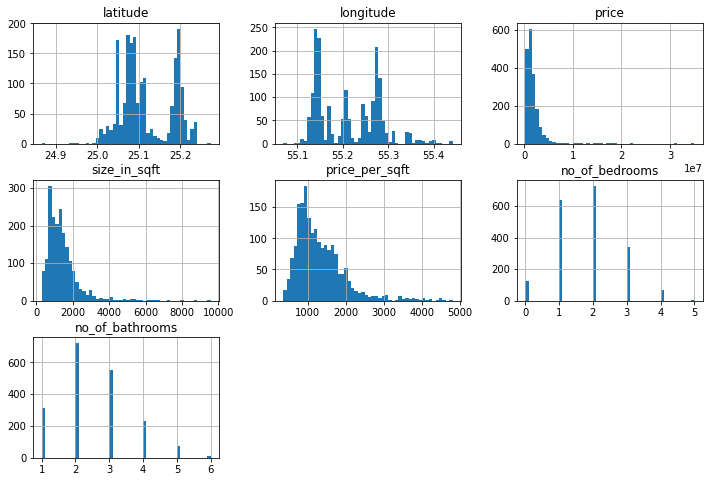

In [4]:
import matplotlib.pyplot as plt

df.hist(bins = 50, figsize = (12,8))
plt.show

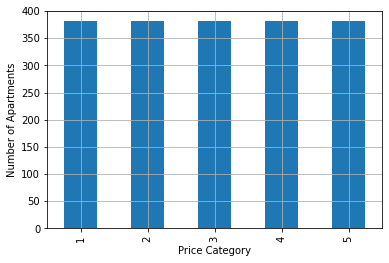

In [5]:
import numpy as np
df['size_cut'] = pd.qcut(df['size_in_sqft'], q = [0., 0.2, 0.4, 0.6, 0.8, 1.], labels = [1,2,3,4,5])

df['size_cut'].value_counts().sort_index().plot.bar(grid = True)
plt.xlabel('Price Category')
plt.ylabel('Number of Apartments')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(df, test_size = 0.2, stratify = df['size_cut'])

In [7]:
for i in (strat_train_set, strat_test_set):
  i.drop('size_cut', axis = 1, inplace=True)

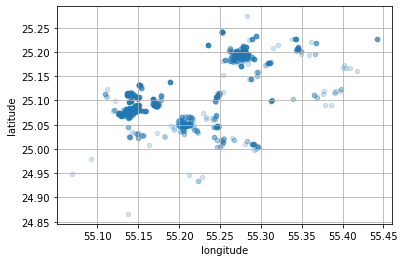

In [8]:
dubai = strat_train_set.copy()

dubai.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True, alpha = 0.2)
plt.show()

In [9]:
corr_matrix = dubai.corr()
corr_matrix['price'].sort_values()

pets_allowed          -0.106990
lobby_in_building     -0.106292
shared_pool           -0.105299
childrens_play_area   -0.104924
childrens_pool        -0.102294
vastu_compliant       -0.089621
security              -0.088827
networked             -0.085619
barbecue_area         -0.081187
shared_gym            -0.080922
study                 -0.041498
longitude             -0.033307
kitchen_appliances    -0.017267
shared_spa            -0.001224
walk_in_closet         0.000544
view_of_landmark       0.005852
central_ac             0.010890
covered_parking        0.013003
balcony                0.018201
built_in_wardrobes     0.019240
maid_service           0.022735
unfurnished            0.031045
private_garden         0.056073
private_jacuzzi        0.095938
maid_room              0.096645
private_gym            0.106427
view_of_water          0.109374
concierge              0.122957
latitude               0.187711
private_pool           0.363572
no_of_bedrooms         0.505738
no_of_ba

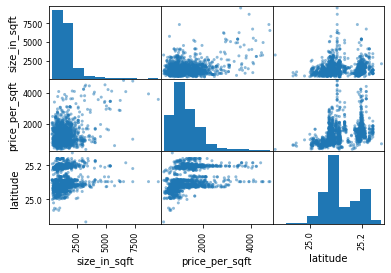

In [10]:
from pandas.plotting import scatter_matrix

attributes = ['private_pool', 'no_of_bathrooms', 'no_of_bedrooms', 'size_in_sqft']

scatter_matrix(dubai[['size_in_sqft', 'price_per_sqft', 'latitude']])
plt.show()

In [11]:
scale_mapper = {'Low':1, 'Medium':2, 'High': 3, 'Ultra': 4}

dubai['quality'] = df['quality'].replace(scale_mapper)



In [12]:
dubai_exp = dubai.copy()
from sklearn.metrics.pairwise import rbf_kernel

dubai_exp = rbf_kernel(dubai_exp[["latitude"]], [[25.075]], gamma=0.1)

dubai_exp



array([[0.99997741],
       [0.99987635],
       [0.99999873],
       ...,
       [0.99991452],
       [0.99986168],
       [0.99999873]])

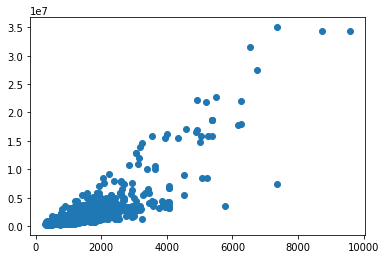

In [13]:
# Housing is dubai data, without the independent variable, price
# Housing label is just the price of column
housing = dubai.drop('price', axis = 1)
housing_label = dubai['price'].copy()

plt.scatter(housing['size_in_sqft'], housing_label)
plt.show()

In [14]:
# Feature Engineering: Standardization. Sometimes, the range of the values of the attributes 
# is too much/varied, which decreases the validity/accuracy of model/predictions
# so we scale the variables. Here I have used standardization to scale the values.
# Here, I have scaled both the dependent and independent variables

from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

some_new_data = dubai[['size_in_sqft']].iloc[:5]

model = TransformedTargetRegressor(LinearRegression(), 
                                   transformer = StandardScaler())

model.fit(housing[['size_in_sqft']], housing_label)
predictions = model.predict(some_new_data)

In [15]:
type(housing['size_in_sqft'])

pandas.core.series.Series

In [16]:
# Custom Transformers
# Sometimes, the transformation that are required while scaling may not be available. 
# So we have to create our own 
# Here, I have used Function Transformer

from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log)

log_size_sqft = log_transformer.transform(housing[['size_in_sqft']])

In [17]:
from sklearn.utils.validation import check_is_fitted
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
# Creating a custom transformer using class
# Here, I have tried to create a custom class for min-max scaling
# between the range -1 and 1

class MinMaxClone(BaseEstimator, TransformerMixin):

  def __init__(self):  
    pass

  def fit(self, X, y=None):
    self.min = X.min()
    self.max = X.max() 
    self.n_features_in_ = X.shape[1]
    return self 

  def transform(self, X):
    check_is_fitted(self)  # looks for learned attributes (with trailing _)
    X = check_array(X)
    assert self.n_features_in_ == X.shape[1]
    return (-1 + (2*(X - self.min))/(self.max - self.min))



In [18]:
housing_num = housing.select_dtypes(include=[np.number])
housing_cat = housing.select_dtypes(include=[np.object])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'median')),
    ('standardize', StandardScaler()),
])

from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy = 'median'), StandardScaler())

# As SimpleImputer Does not have get_feature_names_out method, I had to add it
# In this case, I used the get_feature_names_out from standardscaler
SimpleImputer.get_feature_names_out = StandardScaler.get_feature_names_out

housing_num_prepared = num_pipeline.fit_transform(housing_num)



In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

# Dividing the data into continuous and numerical data
housing_num = housing.select_dtypes(include=[np.number]).columns
housing_cat = housing.select_dtypes(include=[np.object]).columns

# Getting the names of the columns 
num_cols = housing_num.to_list()
cat_cols = housing_cat.to_list()

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore')),
])

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'median')),
    ('standardize', StandardScaler()),
])

preprocessing = ColumnTransformer([
    ('num_pipe', num_pipeline, housing_num),
    ('cat_pipe', cat_pipeline, housing_cat)
])




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [27]:
housing_all = preprocessing.fit_transform(housing)
all_df = pd.DataFrame(housing_all.toarray(), columns = preprocessing.get_feature_names_out())

In [28]:
housing_labels = strat_train_set["price"].copy()

housing_labels

id
7700305    1750000
7416326    3600000
7700259    1250000
7580761    1300000
7568118    1575000
            ...   
7622469    2000000
7553094     700000
7621220     650000
7499263     876888
7701686    1500000
Name: price, Length: 1524, dtype: int64

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

housing_predictions = lin_reg.predict(housing)

In [30]:
from sklearn.metrics import mean_squared_error

lin_rsme = mean_squared_error(housing_labels, housing_predictions, squared=False)

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state = 42))
tree_reg.fit(housing, housing_labels)

housing_predictions = tree_reg.predict(housing)
tree_rsme = mean_squared_error(housing_labels, housing_predictions, squared = False)

tree_rsme


0.03622617780011092

In [32]:
# Cross validation

from sklearn.model_selection import cross_val_score

tree_rsme = cross_val_score(tree_reg, housing, housing_labels, scoring = 'neg_root_mean_squared_error', cv = 10)

In [33]:
pd.Series(tree_rsme).describe()

count    1.000000e+01
mean    -6.831538e+05
std      6.005739e+05
min     -2.204604e+06
25%     -7.203925e+05
50%     -4.738530e+05
75%     -4.125166e+05
max     -1.024438e+05
dtype: float64

In [34]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state = 42))

forest_rsme = -cross_val_score(forest_reg, housing, housing_labels, scoring = 'neg_root_mean_squared_error', cv = 10)

pd.Series(forest_rsme).describe()

count    1.000000e+01
mean     4.120486e+05
std      3.231218e+05
min      7.629529e+04
25%      1.948604e+05
50%      2.952878e+05
75%      5.755779e+05
max      1.147032e+06
dtype: float64

In [36]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ('preprocessing', preprocessing), 
    ('randomforest', RandomForestRegressor(random_state = 42)),
    ])

param_grid = [
    {'randomforest__max_features': [4, 6, 8]},
    {'randomforest__max_features': [6, 8, 10]},
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring = 'neg_root_mean_squared_error')

grid_search.fit(housing, housing_labels)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         Index(['latitude', 'longitude', 'size_in_sqft', 'price_per_sqft',
       'no_of_bedrooms', 'no_of_bathrooms', 'quality'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('imp

In [42]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
5,0.544485,0.015997,0.028610,0.001634,10,{'randomforest__max_features': 10},-460554.380098,-1.278523e+06,-626358.808544,-788478.706274,353063.056843,1
2,0.615802,0.148532,0.026784,0.000263,8,{'randomforest__max_features': 8},-505608.161530,-1.257378e+06,-667548.293154,-810178.114747,323055.083539,2
4,0.514920,0.001524,0.028401,0.000046,8,{'randomforest__max_features': 8},-505608.161530,-1.257378e+06,-667548.293154,-810178.114747,323055.083539,2
1,1.318014,0.092044,0.076965,0.008742,6,{'randomforest__max_features': 6},-545966.998319,-1.285933e+06,-659361.953105,-830420.570035,325405.510553,4
3,0.489763,0.005453,0.027103,0.000346,6,{'randomforest__max_features': 6},-545966.998319,-1.285933e+06,-659361.953105,-830420.570035,325405.510553,4
0,0.872162,0.182733,0.065550,0.030702,4,{'randomforest__max_features': 4},-542651.848394,-1.312594e+06,-659993.259897,-838413.123274,338701.506366,6


In [43]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'randomforest__max_features':randint(low = 2, high = 4)}

rnd_search = RandomizedSearchCV(full_pipeline, param_distributions = param_distribs, n_iter = 10, cv = 3, 
                                scoring = 'neg_root_mean_squared_error', random_state = 42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num_pipe',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardize',
                                                                                                StandardScaler())]),
                                                                               Index(['latitude', 'longitude', 'size_in_sqft', 'price_per_sqft',
       'no_of_bedrooms', 'no_of_bathrooms', 'quality'],
      dtype='object')),
                                                                              ('cat_pipe',
                                        

In [45]:
final_model = rnd_search.best_estimator_

feature_importances = final_model['randomforest'].feature_importances_
feature_importances.round(2)

array([0.07, 0.07, 0.26, 0.23, 0.15, 0.11, 0.02, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  ])

In [46]:
sorted(zip(feature_importances,
           final_model['preprocessing'].get_feature_names_out()),
           reverse=True)


[(0.25946005074249495, 'num_pipe__size_in_sqft'),
 (0.2286920225986573, 'num_pipe__price_per_sqft'),
 (0.14558858131961014, 'num_pipe__no_of_bedrooms'),
 (0.11272976109625485, 'num_pipe__no_of_bathrooms'),
 (0.07300934374975356, 'num_pipe__longitude'),
 (0.07192356814331345, 'num_pipe__latitude'),
 (0.03718396921595071, 'cat_pipe__neighborhood_Palm Jumeirah'),
 (0.018415573731393194, 'num_pipe__quality'),
 (0.009823819504281175, 'cat_pipe__neighborhood_Jumeirah'),
 (0.007602357736661024, 'cat_pipe__neighborhood_Downtown Dubai'),
 (0.00632105486265189, 'cat_pipe__neighborhood_Dubai Marina'),
 (0.0050846669806698455, 'cat_pipe__neighborhood_Jumeirah Beach Residence'),
 (0.004207176679544921, 'cat_pipe__neighborhood_Jumeirah Village Circle'),
 (0.0030088399708784372, 'cat_pipe__neighborhood_Business Bay'),
 (0.0020953894871473546, 'cat_pipe__neighborhood_Jumeirah Lake Towers'),
 (0.0019876529955198717, 'cat_pipe__neighborhood_Culture Village'),
 (0.0008145008566956598, 'cat_pipe__neighbor

In [57]:
X_test = strat_test_set.drop("price", axis=1)

scale_mapper = {'Low':1, 'Medium':2, 'High': 3, 'Ultra': 4}
X_test['quality'] = X_test['quality'].replace(scale_mapper)

y_test = strat_test_set["price"].copy()

final_predictions = final_model.predict(X_test)

final_rsme = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rsme)

976326.3972132829


In [58]:
from scipy import stats
confidence = 0.95

squared_errors = (final_predictions - y_test)**2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


array([             nan, 1495268.74550853])

In [59]:
import joblib 

joblib.dump(final_model, 'my_dubai_housing_model.pkl')


['my_dubai_housing_model.pkl']